## Using catchment area module to fetch the catchment for an address or point

### Importing the required modules

In [1]:
import sys
sys.path.append('../../') # importing the module from local file system
from python_utils.location_intelligence import LocationIntelligence

In [2]:
import contextily as cx
from osmnx.geocoder import geocode
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

### Creating the catchment using distance as basis

In [3]:
location = "Bangalore, India" # it can be a dict as well {"city": "Bangalore", "state": "Karnataka", "country": "India"}
location_type = "address"
catchment_basis = "distance"
basis_value = 5 # in km

li = LocationIntelligence(location, location_type, catchment_basis, basis_value)
my_catchment = li.create_catchment()
my_catchment = my_catchment.to_crs('epsg:4326')

### Fetching the coordinates of the address to plot

In [4]:
loc_coords = geocode(location) 
loc_point = Point(loc_coords[1], loc_coords[0])
loc_df = gpd.GeoDataFrame(data={}, geometry=[loc_point]) # one can provide the coodinates to plot manually as well

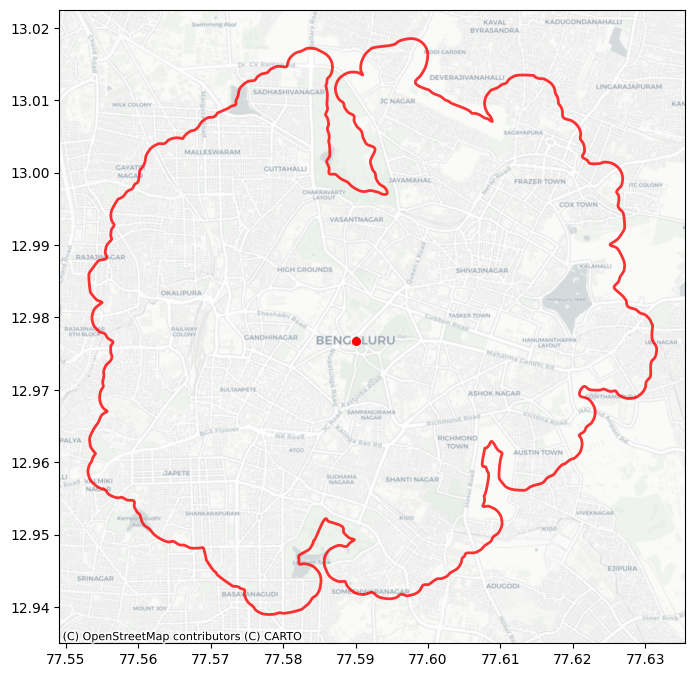

In [17]:
fig, ax = plt.subplots(figsize=(7, 7))
my_catchment.plot(ax = ax, alpha=0.8, edgecolor='r', linewidth=2 ,facecolor="none")
loc_df.plot(ax = ax, color='r', markersize=30)
cx.add_basemap(ax, crs=my_catchment.crs, source=cx.providers.CartoDB.Positron)
plt.tight_layout()

### Creating catchment using time as basis

In [18]:
location = "Bangalore, India" # it can be a dict as well {"city": "Bangalore", "state": "Karnataka", "country": "India"}
location = {"city": "Bangalore", "state": "Karnataka", "country": "India"}
location_type = "address"
catchment_basis = "time"
basis_value = 15 # in minutes

li = LocationIntelligence(location, location_type, catchment_basis, basis_value)
my_catchment = li.create_catchment()
my_catchment = my_catchment.to_crs('epsg:4326')

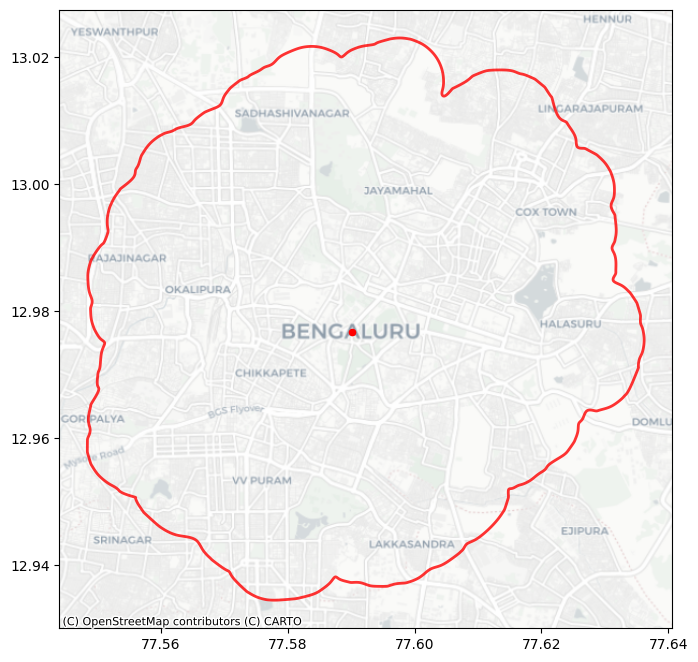

In [19]:
fig, ax = plt.subplots(figsize=(7, 7))
my_catchment.plot(ax = ax, alpha=0.8, edgecolor='r', linewidth=2 ,facecolor="none")
loc_df.plot(ax = ax, color='r', markersize=20)
cx.add_basemap(ax, crs=my_catchment.crs, source=cx.providers.CartoDB.Positron)
plt.tight_layout()